In [1]:
import pandas as pd 
import geopandas as gpd
import urllib
import shapely
pd.options.mode.chained_assignment = None  # default='warn'
from math import *

In [2]:
import osmnx as ox
import networkx as nx

/Users/aconrad/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
###Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’
    if loc_type == "address":
        G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
        G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

In [4]:
G = create_graph("Paris", 5000, "drive")


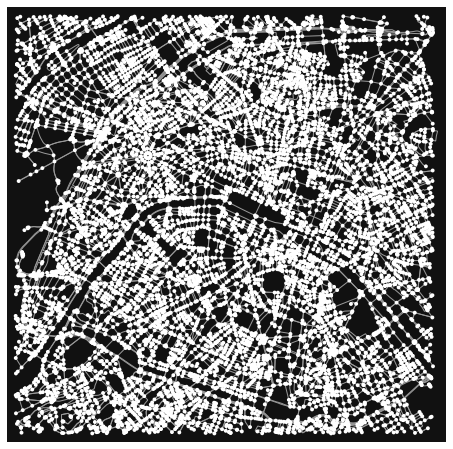

(<Figure size 576x576 with 1 Axes>, <AxesSubplot: >)

In [5]:
ox.plot_graph(G)

In [7]:
G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G)
G = ox.distance.add_edge_lengths(G) 

In [19]:
i = 0
for noeud, info in G.adj.items():
    for voisin, info_lien in info.items():
        if i < 2: 
            print(f"Le lien entre {noeud} et {voisin} a pour poids {info_lien}")
            print(type(info_lien))
            i += 1

Le lien entre 360930 et 480690113 a pour poids {0: {'osmid': 84416296, 'lanes': '3', 'name': 'Rue de Tolbiac', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': False, 'length': 154.085, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fa4d2ee2c70>, 'speed_kph': 30.0, 'travel_time': 18.5}}
<class 'networkx.classes.coreviews.AtlasView'>
Le lien entre 360930 et 361704 a pour poids {0: {'osmid': 84416296, 'lanes': '3', 'name': 'Rue de Tolbiac', 'highway': 'secondary', 'maxspeed': '30', 'oneway': False, 'reversed': True, 'length': 114.307, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fa4d2ee2c40>, 'speed_kph': 30.0, 'travel_time': 13.7}}
<class 'networkx.classes.coreviews.AtlasView'>


In [ ]:
def dix_plus_proche_card(df, posi, carb):
    data_1 = data_2_g(df, carb).sort_values('prix_valeur')
    pos = list(map(float,Adresse_to_gps(posi).split(',')))
    def distancetoposi(p2):
        pos_carb = list(map(float, p2.split(',')))
        a,b = pos_carb
        pos_carb = b,a
        x,y = pos
        pos = y,x
        route, longueur = itinéraire(pos, pos_carb) 
        return longueur
    new_df = data_1['geom'].apply(distancetoposi).sort_values().head(10)
    return data_1.loc[new_df.index.to_list()]

In [ ]:
dat_ = pd.read_csv('data/prix-carburants-fichier-quotidien-test-ods.json', sep= ';', on_bad_lines= 'skip')

In [ ]:
dix_plus_proche_card(data_2_g,"1 rue de Rivoli, Paris, France", 'SP95')

In [20]:
def itinéraire(position, station):
    a,b = position
    x,y = station
    start_node = ox.nearest_nodes(G, a,b)
    end_node = ox.nearest_nodes(G, x,y) # Calculate the shortest path
    route = nx.shortest_path(G, start_node, end_node, weight='length') #Plot the route and street networks
    length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length', method="dijkstra")
    return(route, length)

In [1]:
def dix_plus_proche(data, position):
    def iti(station):
        return(itinéraire(position, station)[1])
    vector = data['geometry'].apply(iti)
    return(vector)

In [ ]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return str(str(location.latitude) + ','+ str(location.longitude))


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

In [ ]:
print(Adresse_to_gps("1 rue de Rivoli, Paris, France"), Adresse_to_gps("63 rue du Ruisseau, Paris, France"))


In [21]:
start = (2.3592784,48.8555424)
end = (2.340438,48.8941015)
end2 = (2.378077,48.856340)
end3 =  (2.376176,48.864692)

route, longueur = itinéraire(start, end)
route2, longueur2 = itinéraire(start, end3)
print(longueur, longueur2)


6020.0109999999995 2813.437


In [ ]:
G_bien = create_graph("France", 100000, "drive")

In [ ]:
data_g = gpd.read_file('data/prix-carburants-fichier-quotidien-test-ods.geojson')

In [ ]:
data_g.columns

In [ ]:
data_g.columns

In [ ]:
def data_carb_g(df, carb):
    data_1 = df[['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geometry']]
    d = data_1[data_1.prix_nom == carb]
    d.drop_duplicates(keep = 'first', inplace=True) 
    #df.drop_duplicates(subset ="'column'", keep = 'first', inplace=True) si on veut supprimer selon une colonne
    return d

In [ ]:
data_2_g = data_carb_g(data_g, 'SP95').sort_values('prix_valeur')

In [ ]:
data_2_g

In [ ]:
data_2_g.loc[58312, 'geometry']

In [ ]:
data_2_g.crs

In [ ]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return location.latitude, location.longitude


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

In [ ]:
point = shapely.geometry.Point(Adresse_to_gps("1 rue d'Arsonval, Orsay, France"))
col_adresse = gpd.GeoSeries((point for i in range(len(data_2_g))),index= data_2_g.index, crs = 4326)

In [ ]:
col_adresse.crs

In [ ]:
data_2_g.distance(col_adresse)